   # Data Analytics of the literature review-An enhanced deep learning framework towards the accurate analysis of sequential irregular patterns 

In [24]:
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

In [25]:
import pickle
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import spacy
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from wordcloud import WordCloud

In [26]:
df=pd.read_csv('LitDBforComplexSequentialAnalysisUsingDeepLearni.csv')
df.head()

,JournalName,PaperTittle,Year,Country,Continent,DataSet,DataSetType,ResearchProblem,ResearchObjective,ImplementationFramework,ArchitectureProperties,BaselineModels,BestModels,Methodology,EvaluationMechanism,EvaluationMetric
0,ArXiv: 1809.02105v1 [cs.LG],A Memory-Network Based Solution for Multivaria...,2018,Taiwan,Asia,univariate and multivariate sequential dataset...,sequential,Complexity in modelling and capturing extremel...,To propose an explainable sequential forecasti...,8 models were designed namely autogressive mod...,The MTNet model utilized recurrent neural netw...,"Autoregressive model (AR), autoregressive mode...",Memory Time series network (MTNet),Comparative experimental approach,Prediction accuracy,Root mean squared error (RMSE) and mean absolu...
1,arXiv:1905.12885v1 [cs.LG],Particle Filter Recurrent Neural Networks,2019,Singapore,Asia,sequence datasets from multiple domains for bo...,Sequence,Sequential data prediction problem associated ...,To propose a particle filter recurrent neural ...,particle filter recurrent neural networks (PF-...,Hyperparameter tuning= grid search,"PF-LSTM, PF-GRU with LSTM and GRU",particle filter recurrent neural networks (PF-...,Experimental simulation,Prediction accuracy,Mean Square Error (MSE)
2,arXiv:1811.03711v1,Benchmarking Deep Sequential Models on Volatil...,2018,Canada,North America,Financial stock price,Sequential,Volatility prediction modelling problem,Studying the performance of latest deep sequen...,"Dilated temporal convolutional network (TCN), ...",All recurrent models adopt GRU as their basic ...,"Dilated temporal convolutional network (TCN), ...",DilatedRNN and Dialated CNN,Experimental simulation,Prediction accuracy,Average Negative Log-Likelihood (NLL).
3,arXiv:1907.09207v1 [cs.LG],Deep Learning for Time Series Forecasting: The...,2019,Switzerland,Europe,Power consumption and weather data,Sequential time series,electric load forecasting volatility problems,A systematic experimental analysis of state of...,Feed Forward Neural Networks (FFNN) with archi...,Implemented in Keras 2.12 with Tensorflow as b...,Feed Forward Neural Networks (FFNN) with archi...,LSTM,Comparative,Prediction accuracy,"Root Mean Squared Error (RMSE), Mean Absolute ..."
4,arXiv:1810.10161v1 [cs.NE],Deep Learning with Long Short-Term Memory for ...,2019,NaN,NaN,Trafic data,Sequential,Learning long range dependencies problem in se...,To reduce considerable computing cost of deep ...,Random Connectivity LSTM (RCLSTM) framework,The deep learning framework had a three-layer ...,FFNN and LSTM,RCLSTM and LSTM,Comparative,Prediction accuracy and efficiency,Root Mean Square Error (RMSE)


## Exploratory data analysis of the literature excel infor
This refers to all techniques applied to get more insights from the data. This includes the use of visualisations that summarise the data.

In [27]:
df.tail()

,JournalName,PaperTittle,Year,Country,Continent,DataSet,DataSetType,ResearchProblem,ResearchObjective,ImplementationFramework,ArchitectureProperties,BaselineModels,BestModels,Methodology,EvaluationMechanism,EvaluationMetric
25,Proceedings of the 28th ACM International Conf...,Machine learning vs statistical methods for ti...,2019,Portugal,Europe,Benchmark time series dataset,Sequential time series,Predictive performance challenges associated w...,To compare statistical methods with machine le...,"Statistical models ( ARIMA, Naive2, Theta, exp...",Optimisation=Grid Search,"Statistical models ( ARIMA, Naive2, Theta, exp...",Naive2,Experimental simulation,Computational complexity,Computational time spent by a model
26,arXiv:1803.09704v4 [stat.ML],MOrdReD: Memory-based Ordinal Regression Deep ...,2018,United Kingdom,Europe,Time series,Sequential time series,Robust and accuracy challenges associated with...,To develop a state-of-the-art memory-based ord...,Memory-Based Ordinal Regression Deep Neural Ne...,MOrdReD models environment= Python 2.7 and usi...,"RNN regression, Autoregressive modelling of or...",Memory-Based Ordinal Regression Deep Neural Ne...,Experimental simulation,Prediction accuracy,Symmetric Mean Absolute Percentage Error (SMAP...
27,Journal of Advances in Modelling Earth Systems...,Analog forecasting of extreme-causing weather ...,2019,United States of America,North America,weather,Sequential,Numerical weather prediction (NWP) models requ...,To propose a state of the art multi-variate da...,Capsule Neural Network (CapsNet),"CapsNet had 2 CNN layers and ReLU layers, filt...","CNN, Logistic Regression, Capsule Neural Network",Capsule Neural Network (CapsNet),Experimental simulation,Prediction accuracy,Recalls
28,arXiv:1906.04397v1 [stat.ML],Probabilistic Forecasting with Temporal Convol...,2019,China,Asia,Real world industrial data and benchmark publi...,Sequential time series,Forecasting deficiencies in accurate capturing...,To present a deep probabilistic forecasting fr...,NaN,DeepTCN consist of stacked residual blocks bas...,"Seasonal ARIMA (SARIMA), Gradient boosting tre...",NaN,NaN,Prediction accuracy and efficiency,"Symmetric Mean Absolute Percent Error (SMAPE),..."
29,arXiv:1909.00590v3 [cs.LG],Recurrent Neural Networks for Time Series Fore...,2019,Australia,Australia,Forecasting competitions,Sequential time series,Performance challenges associated with sequent...,To present an extensive empirical study of exi...,Recurrent neural network (RNN) architectures,"Application of different optimisers (Adam, Ada...","Statistical ETS, ARIMA, Elman Recurrent Unit,...",Recurrent neural network (RNN) architectures,Experimental simulation,Prediction accuracy,Mean Symmetric Mean Absolute Percentage Error ...


In [28]:
df.dtypes

JournalName                object
PaperTittle                object
Year                        int64
Country                    object
Continent                  object
DataSet                    object
DataSetType                object
ResearchProblem            object
ResearchObjective          object
ImplementationFramework    object
ArchitectureProperties     object
BaselineModels             object
BestModels                 object
Methodology                object
EvaluationMechanism        object
EvaluationMetric           object
dtype: object

### Visualising the most frequent words

In [29]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

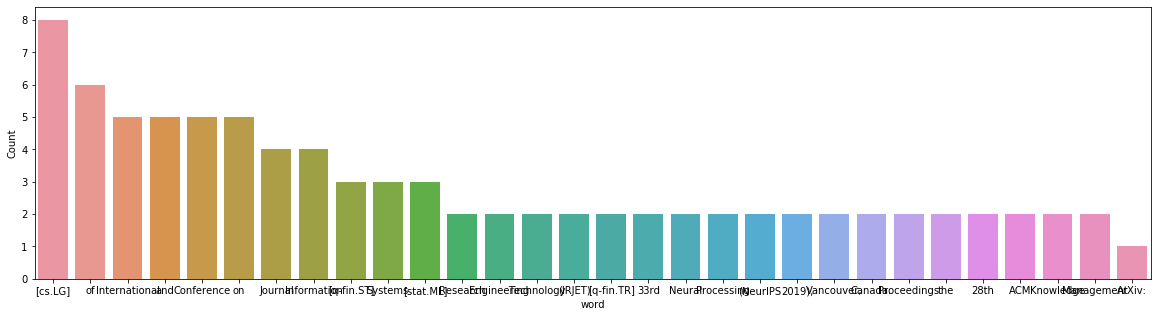

In [30]:
freq_words(df['JournalName'])

From the above analysis, one can deduce that the most frequent words in the dataset are words that have litle effect on meaning. Words such as "to, in, the" have to be dropped to improve the acurace of the model.

## Feature Engineering

In [31]:
nlp = spacy.load('en_core_web_sm')
nlp.vocab['however'].is_stop = False
nlp.vocab['no'].is_stop = False
nlp.vocab['not'].is_stop = False
nlp.vocab['but'].is_stop = False
nlp.vocab['ve'].is_stop = True

### Removing stop words and tokenizing

In [32]:
def strip_stopwords(Headline):
    s = []
    for r in tqdm(Headline):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

def tokenization(x):
    Headline_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        Headline_tokens.append(temp)
    
    return Headline_tokens

In [33]:
df['BestModels'] = tokenization(df['JournalName'])

100%|█████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 107.05it/s]


In [34]:
df['BestModels']=strip_stopwords(df['JournalName'])

100%|███████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 10029.42it/s]


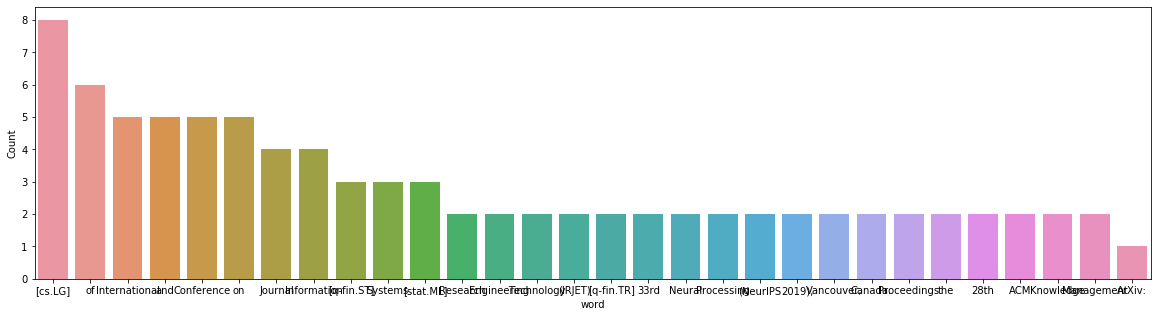

In [35]:
freq_words(df['JournalName'])

In [36]:
def word_cloud(text):
    #We get the directory that we are working on
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    #We read the mask image into a numpy array
    #avengers_mask = np.array(Image.open(os.path.join(file, "avengers.png")))
    #We generate the wordcloud using the series created and the mask 
    word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, 
                           background_color="black", max_words=2000, mask=mask, 
                           contour_width=1, contour_color="steelblue", 
                           colormap="nipy_spectral").generate(text)

    #Now we plot the figure
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation="hermite")
    plt.axis("off")    
    plt.show()   

### Word cloud for the dataset
In this literature analysis the word cloud is an image composed of words used in our research search space, in which the size of each word indicates its frequency.

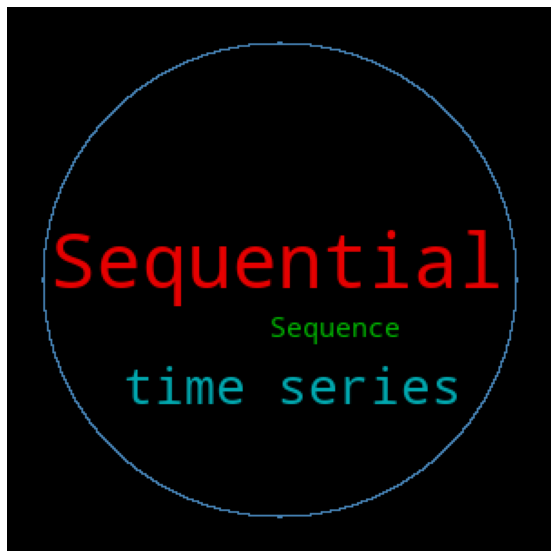

In [37]:
word_cloud(pd.Series([t for t in df.DataSetType]).str.cat(sep=' '))      

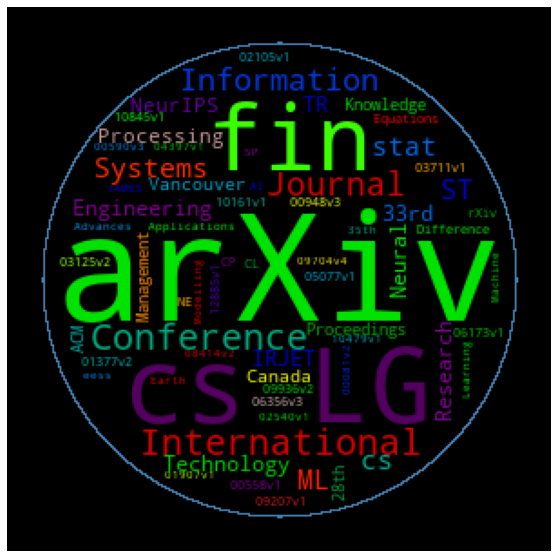

In [38]:
word_cloud(pd.Series([t for t in df.JournalName]).str.cat(sep=' '))      

As can be seen above, after removing stop words the visualisation of frequent words consists of the more meaningful words

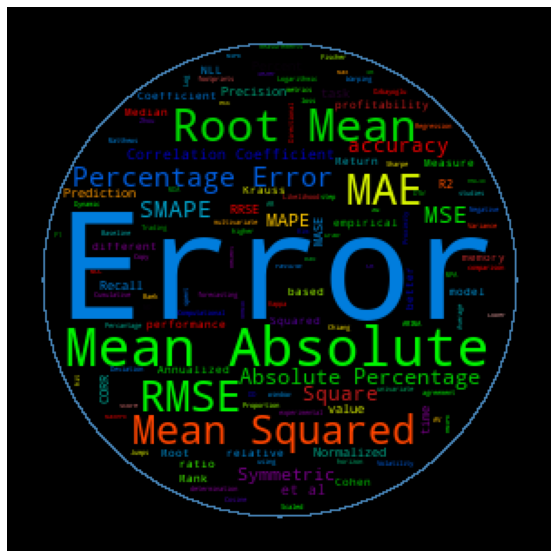

In [39]:
word_cloud(pd.Series([t for t in df.EvaluationMetric]).str.cat(sep=' '))   

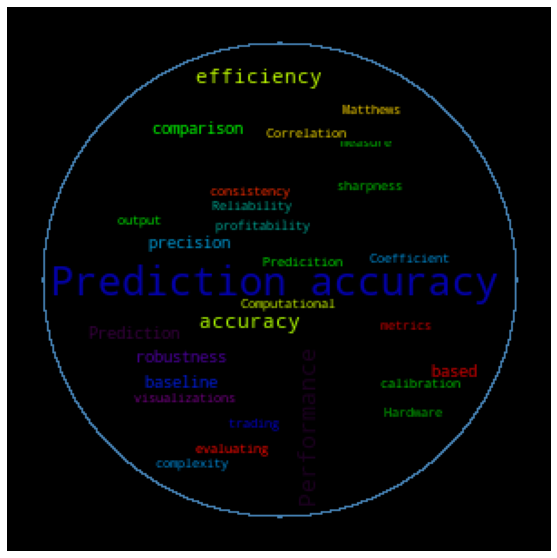

In [40]:
word_cloud(pd.Series([t for t in df.EvaluationMechanism]).str.cat(sep=' ')) 

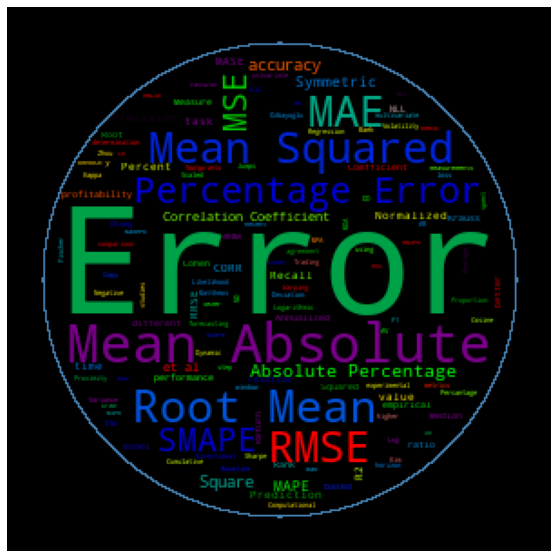

In [41]:
word_cloud(pd.Series([t for t in df.EvaluationMetric]).str.cat(sep=' ')) 

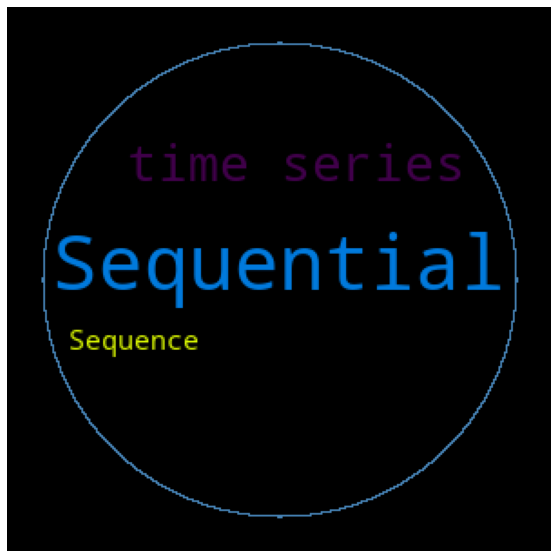

In [42]:
word_cloud(pd.Series([t for t in df.DataSetType]).str.cat(sep=' '))

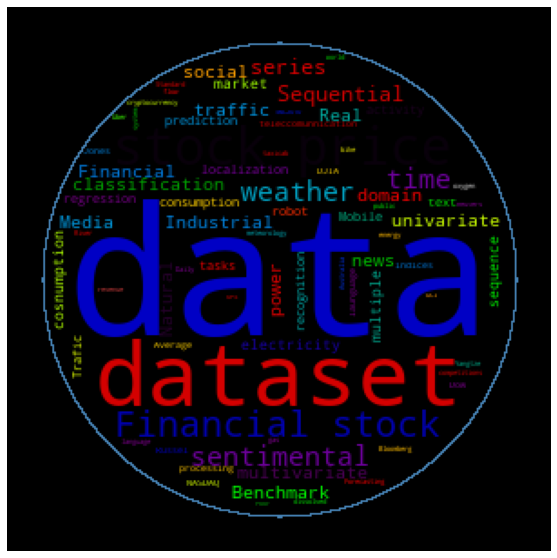

In [43]:
word_cloud(pd.Series([t for t in df.DataSet]).str.cat(sep=' '))

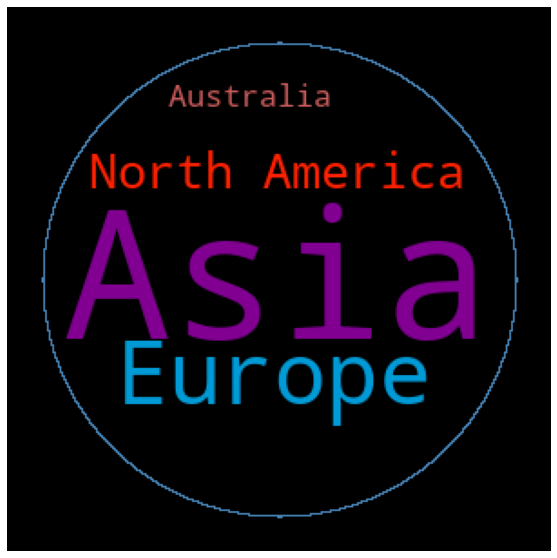

In [44]:
word_cloud(pd.Series([t for t in df.Continent]).str.cat(sep=' '))

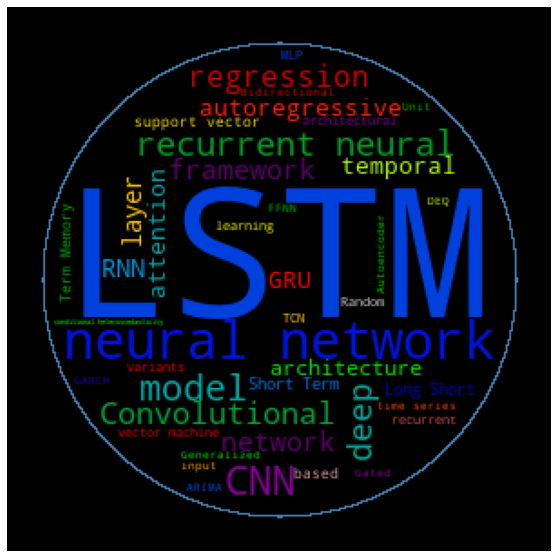

In [45]:
word_cloud(pd.Series([t for t in df.ImplementationFramework]).str.cat(sep=' '))

In [46]:
df=pd.read_csv('dengue_features_train.csv')
df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
